<a href="https://colab.research.google.com/github/ancestor9/Gyeongbok-AI-study/blob/main/2025/%EB%8F%84%EC%9E%A5%EA%B9%A8%EA%B8%B0/03_missing_value_imputation_Consumer_Behavior_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: 내 드라이브를 마운트(mount) 하라

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
file_path = '/content/drive/MyDrive/data/mapped_df.pkl'
import pandas as pd
df = pd.read_pickle(file_path)

df

,성별,연령,지역,직업,소득,학력,주거형태,결혼여부,자녀수,평일인터넷,...,국드장르3,국드장르4,국드장르5,국드장르6,국드장르7,국드장르8,국드장르9,국드장르10,PPL구입여부,year
0,남,14,서울,학생(재수생포함),500-599만원,중학교 재학,자가,미혼,NaN,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,있다,2018
1,남,14,서울,학생(재수생포함),700-799만원,중학교 재학,자가,미혼,NaN,NaN,...,웹툰/소설/만화 원작 드라마,NaN,NaN,NaN,NaN,NaN,NaN,NaN,없다,2018
2,남,14,서울,학생(재수생포함),500-599만원,중학교 재학,자가,미혼,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,없다,2018
3,남,14,서울,학생(재수생포함),700-799만원,중학교 재학,전세,미혼,NaN,90.0,...,액션 드라마,의학/메디컬 드라마,공포/호러 드라마,퓨전사극,청춘/학원 드라마,코미디/시트콤/예능 드라마,NaN,NaN,있다,2018
4,남,14,서울,학생(재수생포함),500-599만원,중학교 재학,자가,미혼,NaN,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,없다,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,여,58,광주/전라/제주,기능/노무직,99만원 이하,중학교 졸업,자가,기타(이혼/별거/사별),2명,NaN,...,스포츠 드라마,NaN,NaN,NaN,NaN,NaN,NaN,NaN,있다,2019
7996,여,63,광주/전라/제주,전업주부,600-699만원,고등학교 졸업,자가,기혼,2명,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,없다,2019
7997,여,61,광주/전라/제주,기능/노무직,300-399만원,중학교 졸업,전세,기혼,1명,NaN,...,가족 드라마,정통사극,NaN,NaN,NaN,NaN,NaN,NaN,없다,2019
7998,여,67,광주/전라/제주,기능/노무직,100-199만원,중학교 졸업,자가,기타(이혼/별거/사별),2명,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,없다,2019


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47161 (\N{HANGUL SYLLABLE RYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

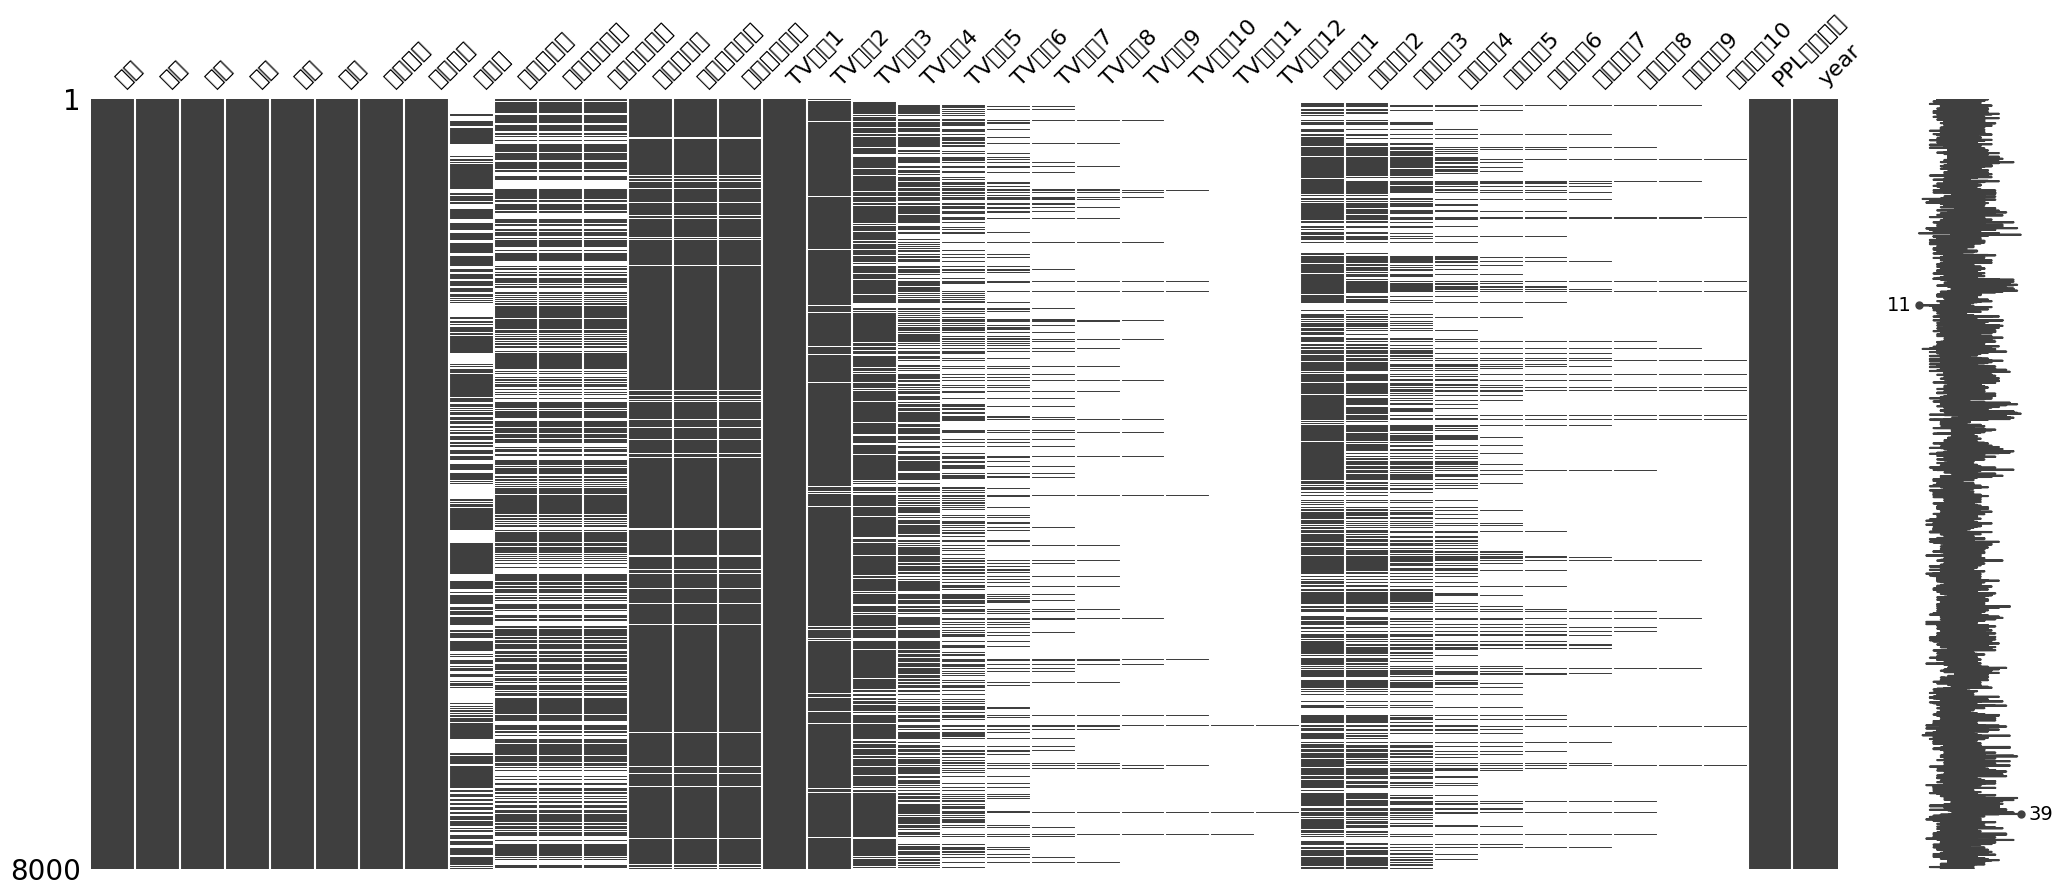

In [2]:
# prompt: df의 결측치를 시각화로 보여주라

import missingno as msno
import matplotlib.pyplot as plt

msno.matrix(df)
plt.show()

In [6]:
# prompt: 그림에서 한글이 꺠진다. 해결해줘

import matplotlib as mpl

# 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') # 나눔바른고딕 폰트 사용
mpl.rcParams['axes.unicode_minus'] = False # 유니코드 마이너스 기호 깨짐 방지


## **[구글 코랩(colab) 한글 깨짐 현상 해결방법](https://teddylee777.github.io/colab/colab-korean/)**

In [8]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (43.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126333 files and direc

In [3]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

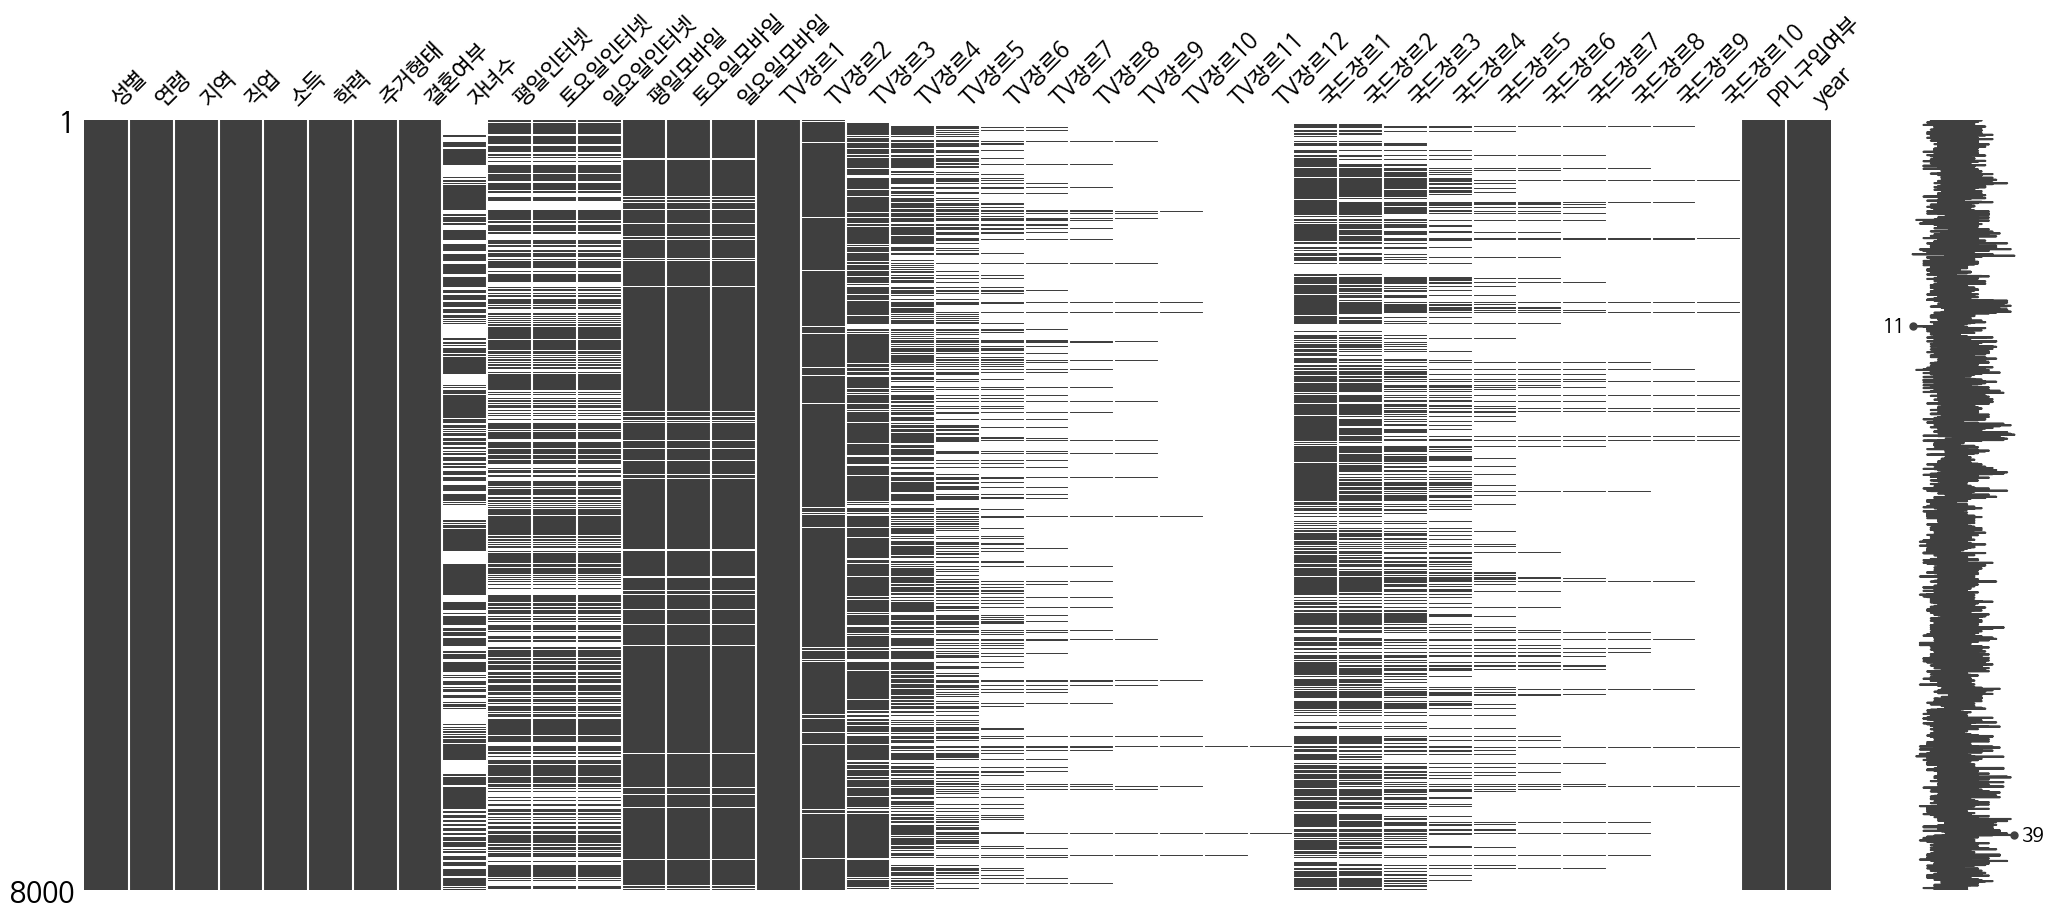

In [4]:
msno.matrix(df)
plt.show()


In [7]:
# prompt: df의 결츨치를 각 컬럼별로 백분유롤 보여줘, 내림차순으로

missing_percentages = df.isnull().sum() * 100 / len(df)
missing_percentages.sort_values(ascending=False, inplace=True)
missing_percentages

,0
TV장르12,99.6375
TV장르11,99.1750
국드장르10,98.8625
TV장르10,98.1750
국드장르9,97.9750
TV장르9,96.5000
국드장르8,96.3000
국드장르7,94.0750
TV장르8,93.6250
국드장르6,90.5125


In [8]:
# prompt: 결측치가 50% 이상인 변수는 제거하라

# 기존 코드에서 결측치 50% 이상 변수 제거 부분 추가
threshold = 0.5  # 50% 기준
df = df.loc[:, df.isnull().mean() < threshold]
df

,성별,연령,지역,직업,소득,학력,주거형태,결혼여부,자녀수,평일인터넷,...,토요일모바일,일요일모바일,TV장르1,TV장르2,TV장르3,TV장르4,국드장르1,국드장르2,PPL구입여부,year
0,남,14,서울,학생(재수생포함),500-599만원,중학교 재학,자가,미혼,NaN,180.0,...,30.0,30.0,음악/공연/오디션,스포츠/골프,예능/오락,어린이/만화,NaN,NaN,있다,2018
1,남,14,서울,학생(재수생포함),700-799만원,중학교 재학,자가,미혼,NaN,NaN,...,30.0,60.0,국내 드라마,영화,예능/오락,음악/공연/오디션,가족 드라마,정통사극,없다,2018
2,남,14,서울,학생(재수생포함),500-599만원,중학교 재학,자가,미혼,NaN,0.0,...,180.0,120.0,국내 드라마,예능/오락,음악/공연/오디션,NaN,형사/추리/법정 드라마,NaN,없다,2018
3,남,14,서울,학생(재수생포함),700-799만원,중학교 재학,전세,미혼,NaN,90.0,...,120.0,120.0,국내 드라마,영화,예능/오락,음악/공연/오디션,로맨스 드라마,멜로 드라마,있다,2018
4,남,14,서울,학생(재수생포함),500-599만원,중학교 재학,자가,미혼,NaN,60.0,...,60.0,60.0,해외 드라마,예능/오락,교육,NaN,NaN,NaN,없다,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,여,58,광주/전라/제주,기능/노무직,99만원 이하,중학교 졸업,자가,기타(이혼/별거/사별),2명,NaN,...,60.0,60.0,뉴스/보도,교양/생활정보,시사/토론,국내 드라마,로맨스 드라마,멜로 드라마,있다,2019
7996,여,63,광주/전라/제주,전업주부,600-699만원,고등학교 졸업,자가,기혼,2명,NaN,...,30.0,30.0,국내 드라마,예능/오락,NaN,NaN,로맨스 드라마,멜로 드라마,없다,2019
7997,여,61,광주/전라/제주,기능/노무직,300-399만원,중학교 졸업,전세,기혼,1명,NaN,...,30.0,30.0,뉴스/보도,국내 드라마,영화,예능/오락,로맨스 드라마,멜로 드라마,없다,2019
7998,여,67,광주/전라/제주,기능/노무직,100-199만원,중학교 졸업,자가,기타(이혼/별거/사별),2명,NaN,...,30.0,30.0,뉴스/보도,국내 드라마,예능/오락,NaN,로맨스 드라마,멜로 드라마,없다,2019


In [9]:
df.columns

Index(['성별', '연령', '지역', '직업', '소득', '학력', '주거형태', '결혼여부', '자녀수', '평일인터넷',
       '토요일인터넷', '일요일인터넷', '평일모바일', '토요일모바일', '일요일모바일', 'TV장르1', 'TV장르2',
       'TV장르3', 'TV장르4', '국드장르1', '국드장르2', 'PPL구입여부', 'year'],
      dtype='object')

<Axes: >

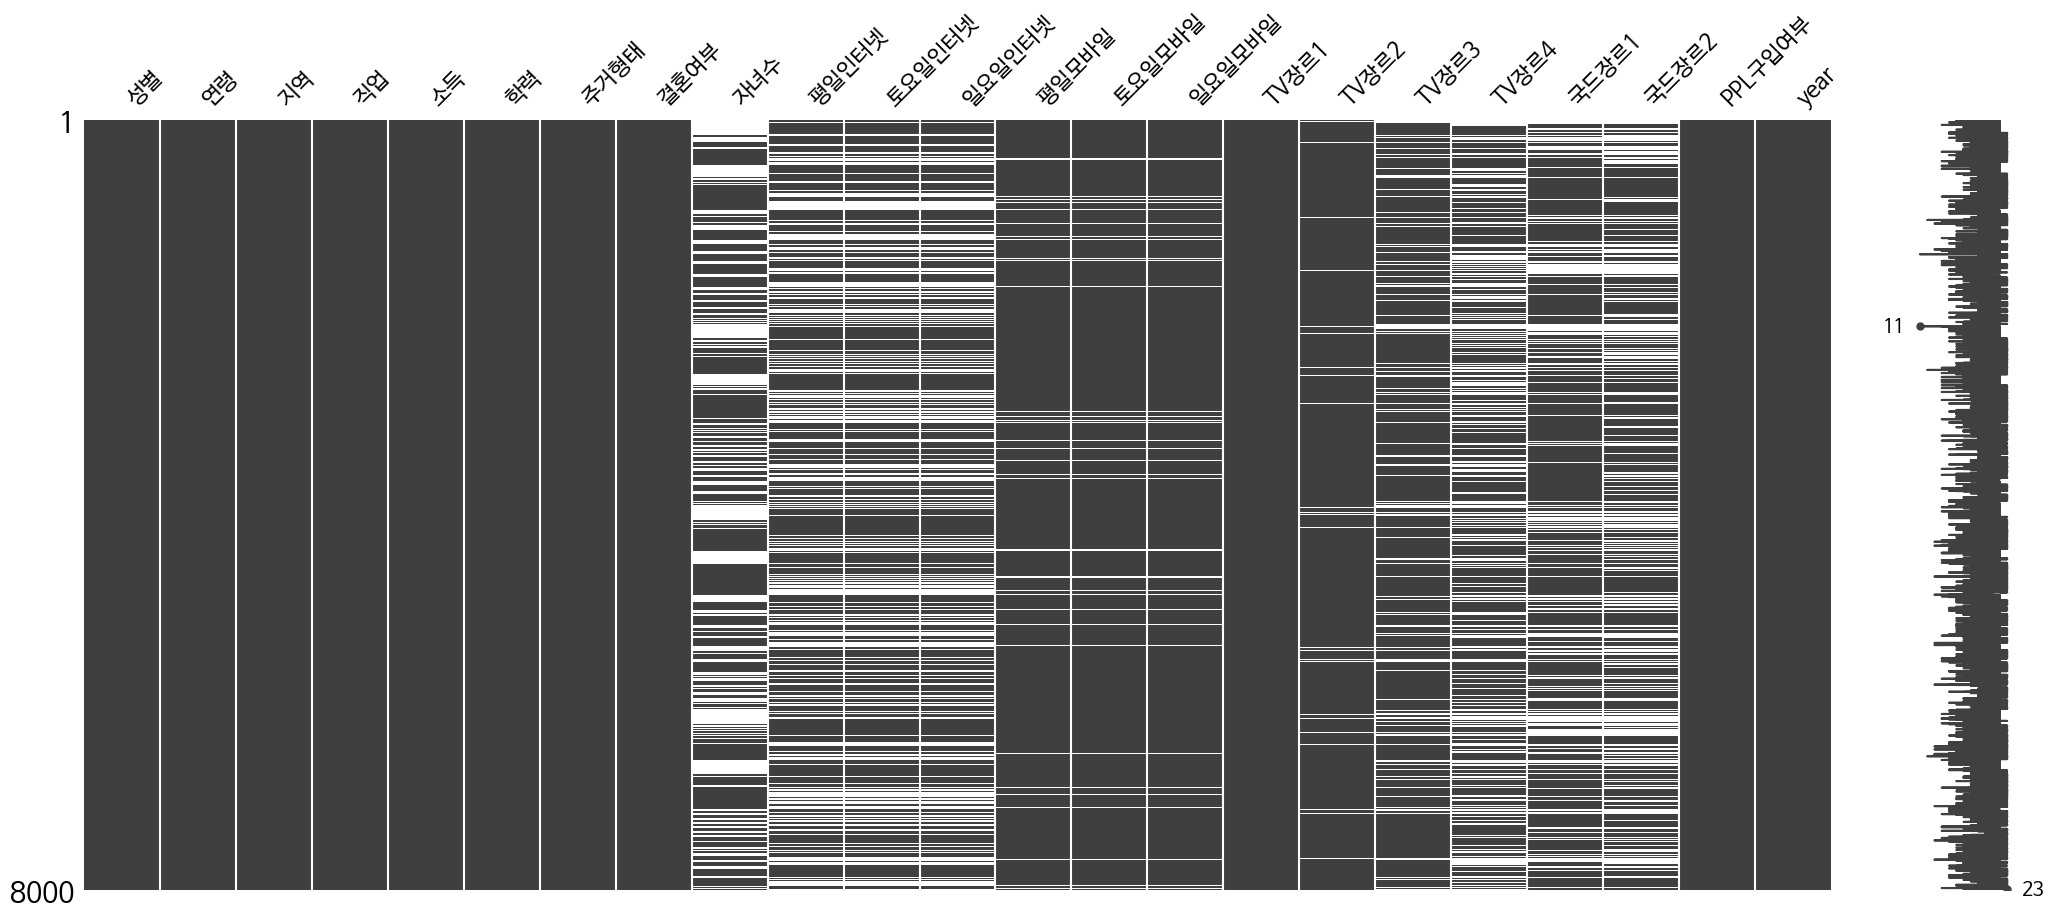

In [10]:
msno.matrix(df)

In [12]:
# prompt: df의 각 컬럼별로 데이터 형태, 결측치 비율, 고유값, 대표적인 값 10개 을 요약하여 보여주라

import pandas as pd

def summarize_dataframe(df):
  summary = []
  for col in df.columns:
    dtype = df[col].dtype
    missing_ratio = df[col].isnull().sum() / len(df) * 100
    unique_values = df[col].nunique()
    top_10_values = df[col].value_counts().head(10)

    summary.append({
        'Column': col,
        'Data Type': dtype,
        'Missing Ratio (%)': missing_ratio,
        'Unique Values': unique_values,
        'Top 10 Values': top_10_values
    })
  return pd.DataFrame(summary)


summary_df = summarize_dataframe(df)
summary_df


,Column,Data Type,Missing Ratio (%),Unique Values,Top 10 Values
0,성별,object,0.0000,2,"성별 남 4035 여 3965 Name: count, dtype: int64"
1,연령,int64,0.0000,57,연령 48 222 55 201 43 198 38 197 44 ...
2,지역,object,0.0000,7,지역 경기/인천 2610 서울 1880 부산/울산/경남 ...
3,직업,object,0.0000,7,직업 판매/서비스직 1501 학생(재수생포함) 1494 사무직 ...
4,소득,object,0.0000,12,소득 500-599만원 1896 400-499만원 1566 300-399...
5,학력,object,0.0000,12,학력 고등학교 졸업 2652 대학교 졸업 2456 전문대학 졸업 ...
6,주거형태,object,0.0000,5,주거형태 자가 6192 전세 1476 월세 277...
7,결혼여부,object,0.0000,3,결혼여부 기혼 5016 미혼 2720...
8,자녀수,object,37.7875,4,자녀수 2명 3483 1명 1146 3명 이상 340 ...
9,평일인터넷,float64,35.5000,44,평일인터넷 60.0 1820 30.0 1169 120.0 62...


In [13]:
summary_df

,Column,Data Type,Missing Ratio (%),Unique Values,Top 10 Values
0,성별,object,0.0000,2,"성별 남 4035 여 3965 Name: count, dtype: int64"
1,연령,int64,0.0000,57,연령 48 222 55 201 43 198 38 197 44 ...
2,지역,object,0.0000,7,지역 경기/인천 2610 서울 1880 부산/울산/경남 ...
3,직업,object,0.0000,7,직업 판매/서비스직 1501 학생(재수생포함) 1494 사무직 ...
4,소득,object,0.0000,12,소득 500-599만원 1896 400-499만원 1566 300-399...
5,학력,object,0.0000,12,학력 고등학교 졸업 2652 대학교 졸업 2456 전문대학 졸업 ...
6,주거형태,object,0.0000,5,주거형태 자가 6192 전세 1476 월세 277...
7,결혼여부,object,0.0000,3,결혼여부 기혼 5016 미혼 2720...
8,자녀수,object,37.7875,4,자녀수 2명 3483 1명 1146 3명 이상 340 ...
9,평일인터넷,float64,35.5000,44,평일인터넷 60.0 1820 30.0 1169 120.0 62...


In [16]:
# prompt: summary_df의 Missing Ratio (%) 오름차순으로

summary_df = summary_df.sort_values(by='Missing Ratio (%)', ascending=True)
summary_df


,Column,Data Type,Missing Ratio (%),Unique Values,Top 10 Values
6,주거형태,object,0.0000,5,주거형태 자가 6192 전세 1476 월세 277...
0,성별,object,0.0000,2,"성별 남 4035 여 3965 Name: count, dtype: int64"
1,연령,int64,0.0000,57,연령 48 222 55 201 43 198 38 197 44 ...
7,결혼여부,object,0.0000,3,결혼여부 기혼 5016 미혼 2720...
2,지역,object,0.0000,7,지역 경기/인천 2610 서울 1880 부산/울산/경남 ...
3,직업,object,0.0000,7,직업 판매/서비스직 1501 학생(재수생포함) 1494 사무직 ...
4,소득,object,0.0000,12,소득 500-599만원 1896 400-499만원 1566 300-399...
5,학력,object,0.0000,12,학력 고등학교 졸업 2652 대학교 졸업 2456 전문대학 졸업 ...
21,PPL구입여부,object,0.0000,2,"PPL구입여부 없다 6371 있다 1629 Name: count, dty..."
22,year,int64,0.0000,2,"year 2018 4000 2019 4000 Name: count, dt..."


## **Object 형태의 데이터를 Category / Numerical 로 변환하기**

<img src='https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FIdcd4%2FbtrQUajRK5w%2FV5ElE7pdd12hqhdMcGPeh1%2Fimg.png'>

In [18]:
# prompt: object 형태의 컬럼을 보여줘

for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Column '{col}' has object type")
        print(df[col].sample(5)) # or any other way to display the column
        print("-" * 20)


Column '성별' has object type
1919    남
1175    여
1705    여
3589    여
6943    여
Name: 성별, dtype: object
--------------------
Column '지역' has object type
7462    광주/전라/제주
7848    부산/울산/경남
2207       경기/인천
2547       경기/인천
4418          서울
Name: 지역, dtype: object
--------------------
Column '직업' has object type
4779      판매/서비스직
26      학생(재수생포함)
3796       기능/노무직
2039       기능/노무직
6066    학생(재수생포함)
Name: 직업, dtype: object
--------------------
Column '소득' has object type
7965    200-299만원
2447    400-499만원
938     400-499만원
3704    200-299만원
6063    500-599만원
Name: 소득, dtype: object
--------------------
Column '학력' has object type
3694    전문대학 재학
6395    고등학교 졸업
2180    전문대학 졸업
1615     대학교 졸업
5368    고등학교 졸업
Name: 학력, dtype: object
--------------------
Column '주거형태' has object type
7925    자가
6382    자가
4243    전세
5395    자가
7012    자가
Name: 주거형태, dtype: object
--------------------
Column '결혼여부' has object type
1767    기혼
5033    기혼
5150    기혼
4652    기혼
2932    기혼
Name: 결혼여부, dtype: obje

In [19]:
# prompt: df 컬럼에서 소득, 자녀수, PPL구입여부 3개 변수를 제외하고 모두 category 형태로 변경하라

exclude_cols = ['소득', '자녀수', 'PPL구입여부']
for col in df.columns:
  if col not in exclude_cols:
    df[col] = df[col].astype('category')


<ipython-input-19-98fddb78a9bc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
<ipython-input-19-98fddb78a9bc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype('category')
<ipython-input-19-98fddb78a9bc>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [20]:
summarize_dataframe(df)

,Column,Data Type,Missing Ratio (%),Unique Values,Top 10 Values
0,성별,category,0.0000,2,"성별 남 4035 여 3965 Name: count, dtype: int64"
1,연령,category,0.0000,57,연령 48 222 55 201 43 198 44 197 38 ...
2,지역,category,0.0000,7,지역 경기/인천 2610 서울 1880 부산/울산/경남 ...
3,직업,category,0.0000,7,직업 판매/서비스직 1501 학생(재수생포함) 1494 사무직 ...
4,소득,object,0.0000,12,소득 500-599만원 1896 400-499만원 1566 300-399...
5,학력,category,0.0000,12,학력 고등학교 졸업 2652 대학교 졸업 2456 전문대학 졸업 ...
6,주거형태,category,0.0000,5,주거형태 자가 6192 전세 1476 월세 277...
7,결혼여부,category,0.0000,3,결혼여부 기혼 5016 미혼 2720...
8,자녀수,object,37.7875,4,자녀수 2명 3483 1명 1146 3명 이상 340 ...
9,평일인터넷,category,35.5000,44,평일인터넷 60.0 1820 30.0 1169 120.0 62...


In [21]:
df['소득']

,소득
0,500-599만원
1,700-799만원
2,500-599만원
3,700-799만원
4,500-599만원
...,...
7995,99만원 이하
7996,600-699만원
7997,300-399만원
7998,100-199만원


In [24]:
# prompt: df['소득']의 값에서 수자만 추출하는 정규표현식을으로 표현하고 예를 들어 600-699 는 600과 699의 평균으로 보여주고 수자가 하나인 것은 하나의 수자만

import pandas as pd
import re

def extract_income(income_str):
  if pd.isna(income_str):
      return None

  numbers = re.findall(r'\d+', income_str)
  if len(numbers) == 0:
    return None
  elif len(numbers) == 1:
    return int(numbers[0])
  elif len(numbers) == 2:
    return (int(numbers[0]) + int(numbers[1])) / 2
  else:
      return None

df['소득_숫자'] = df['소득'].apply(extract_income)


<ipython-input-24-9d94d0b153d4>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['소득_숫자'] = df['소득'].apply(extract_income)


In [25]:
df.head()

,성별,연령,지역,직업,소득,학력,주거형태,결혼여부,자녀수,평일인터넷,...,일요일모바일,TV장르1,TV장르2,TV장르3,TV장르4,국드장르1,국드장르2,PPL구입여부,year,소득_숫자
0,남,14,서울,학생(재수생포함),500-599만원,중학교 재학,자가,미혼,NaN,180.0,...,30.0,음악/공연/오디션,스포츠/골프,예능/오락,어린이/만화,NaN,NaN,있다,2018,549.5
1,남,14,서울,학생(재수생포함),700-799만원,중학교 재학,자가,미혼,NaN,NaN,...,60.0,국내 드라마,영화,예능/오락,음악/공연/오디션,가족 드라마,정통사극,없다,2018,749.5
2,남,14,서울,학생(재수생포함),500-599만원,중학교 재학,자가,미혼,NaN,0.0,...,120.0,국내 드라마,예능/오락,음악/공연/오디션,NaN,형사/추리/법정 드라마,NaN,없다,2018,549.5
3,남,14,서울,학생(재수생포함),700-799만원,중학교 재학,전세,미혼,NaN,90.0,...,120.0,국내 드라마,영화,예능/오락,음악/공연/오디션,로맨스 드라마,멜로 드라마,있다,2018,749.5
4,남,14,서울,학생(재수생포함),500-599만원,중학교 재학,자가,미혼,NaN,60.0,...,60.0,해외 드라마,예능/오락,교육,NaN,NaN,NaN,없다,2018,549.5


In [26]:
df['소득'] = df['소득_숫자']

del df['소득_숫자']

<ipython-input-26-35a705e6b2a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['소득'] = df['소득_숫자']


In [27]:
# prompt: wanring 표현은 없애라
# 폰트 설치 (경고 무시)
import warnings
warnings.filterwarnings("ignore")

In [28]:
df.head()

,성별,연령,지역,직업,소득,학력,주거형태,결혼여부,자녀수,평일인터넷,...,토요일모바일,일요일모바일,TV장르1,TV장르2,TV장르3,TV장르4,국드장르1,국드장르2,PPL구입여부,year
0,남,14,서울,학생(재수생포함),549.5,중학교 재학,자가,미혼,NaN,180.0,...,30.0,30.0,음악/공연/오디션,스포츠/골프,예능/오락,어린이/만화,NaN,NaN,있다,2018
1,남,14,서울,학생(재수생포함),749.5,중학교 재학,자가,미혼,NaN,NaN,...,30.0,60.0,국내 드라마,영화,예능/오락,음악/공연/오디션,가족 드라마,정통사극,없다,2018
2,남,14,서울,학생(재수생포함),549.5,중학교 재학,자가,미혼,NaN,0.0,...,180.0,120.0,국내 드라마,예능/오락,음악/공연/오디션,NaN,형사/추리/법정 드라마,NaN,없다,2018
3,남,14,서울,학생(재수생포함),749.5,중학교 재학,전세,미혼,NaN,90.0,...,120.0,120.0,국내 드라마,영화,예능/오락,음악/공연/오디션,로맨스 드라마,멜로 드라마,있다,2018
4,남,14,서울,학생(재수생포함),549.5,중학교 재학,자가,미혼,NaN,60.0,...,60.0,60.0,해외 드라마,예능/오락,교육,NaN,NaN,NaN,없다,2018


In [31]:
df.isnull().sum().sort_values()

,0
성별,0
연령,0
지역,0
직업,0
학력,0
주거형태,0
결혼여부,0
year,0
PPL구입여부,0
TV장르1,1


In [32]:
summarize_dataframe(df)

,Column,Data Type,Missing Ratio (%),Unique Values,Top 10 Values
0,성별,category,0.0000,2,"성별 남 4035 여 3965 Name: count, dtype: int64"
1,연령,category,0.0000,57,연령 48 222 55 201 43 198 44 197 38 ...
2,지역,category,0.0000,7,지역 경기/인천 2610 서울 1880 부산/울산/경남 ...
3,직업,category,0.0000,7,직업 판매/서비스직 1501 학생(재수생포함) 1494 사무직 ...
4,소득,float64,0.0500,11,소득 549.5 1896 449.5 1566 349.5 119...
5,학력,category,0.0000,12,학력 고등학교 졸업 2652 대학교 졸업 2456 전문대학 졸업 ...
6,주거형태,category,0.0000,5,주거형태 자가 6192 전세 1476 월세 277...
7,결혼여부,category,0.0000,3,결혼여부 기혼 5016 미혼 2720...
8,자녀수,object,37.7875,4,자녀수 2명 3483 1명 1146 3명 이상 340 ...
9,평일인터넷,category,35.5000,44,평일인터넷 60.0 1820 30.0 1169 120.0 62...


In [33]:
# prompt: 소득 컬럼이 nan인 것을 찾아라

# Find rows where the '소득' column is NaN
df[df['소득'].isna()]

,성별,연령,지역,직업,소득,학력,주거형태,결혼여부,자녀수,평일인터넷,...,토요일모바일,일요일모바일,TV장르1,TV장르2,TV장르3,TV장르4,국드장르1,국드장르2,PPL구입여부,year
487,여,15,서울,학생(재수생포함),NaN,중학교 재학,전세,미혼,NaN,60.0,...,240.0,240.0,시사/토론,영화,예능/오락,교육,NaN,NaN,없다,2018
670,여,35,서울,무직/기타,NaN,고등학교 졸업,전세,미혼,NaN,30.0,...,60.0,60.0,뉴스/보도,국내 드라마,예능/오락,NaN,로맨스 드라마,멜로 드라마,없다,2018
4871,여,61,서울,전업주부,NaN,고등학교 졸업,자가,기혼,2명,NaN,...,30.0,30.0,뉴스/보도,교양/생활정보,시사/토론,국내 드라마,가족 드라마,NaN,있다,2019
7203,남,69,강원,무직/기타,NaN,중학교 졸업,전세,기타(이혼/별거/사별),NaN,20.0,...,120.0,180.0,뉴스/보도,시사/토론,국내 드라마,예능/오락,멜로 드라마,스포츠 드라마,없다,2019


In [35]:
# prompt: df[df['소득'].isna()]의 index를

# Find the indices where '소득' is NaN
nan_income_indices = df[df['소득'].isna()].index

nan_income_indices


Index([487, 670, 4871, 7203], dtype='int64')

## 의사결정의 순간
### 결측치 자료를 버릴 것인가? 아니면 어떤 로직으로 소득의 결측치를 채울 것인가?

In [34]:
df.groupby('학력')['소득'].mean()

,소득
학력,
고등학교 재학,553.045326
고등학교 졸업,461.233962
대학교 재학,576.508902
대학교 졸업,557.396376
대학원 재학,626.530000
대학원 졸업,657.930168
전문대학 재학,530.307692
전문대학 졸업,503.910256
정규교육 없음,371.722222


<Axes: xlabel='학력'>

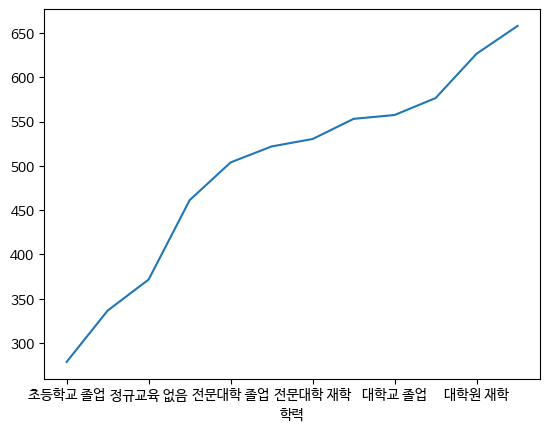

In [43]:
df.groupby('학력')['소득'].mean().sort_values().plot()

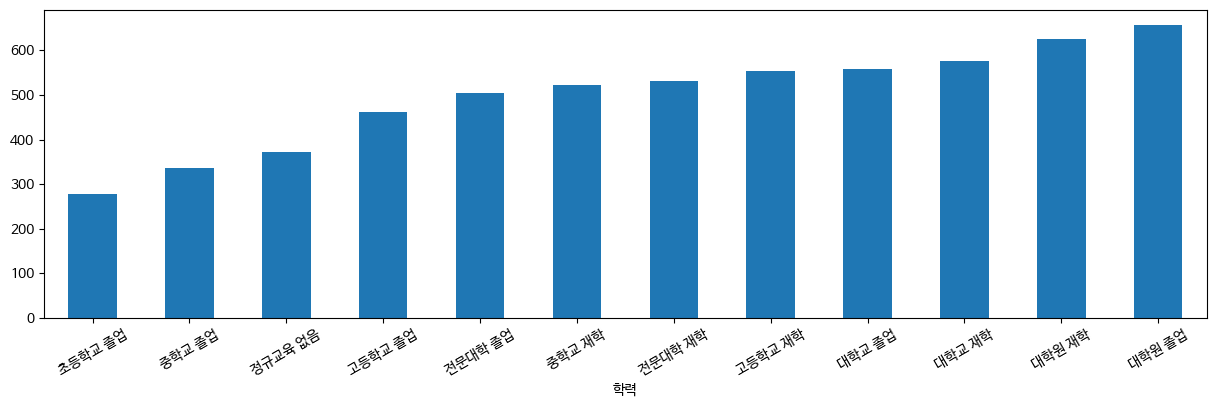

In [49]:
# prompt: df.groupby('학력')['소득'].mean().sort_values().plot() 그림크기를 조절하는 코드
plt.figure(figsize=(15, 4))  # Adjust width and height as needed
df.groupby('학력')['소득'].mean().sort_values().plot(kind='bar', rot= 30)
plt.show()

### <font color='orange'> **왜 소득은 학력순이 아니지?**

In [36]:
# prompt: 소득의 결측치를 학력을 기준으로 평균 소득으로 대체하라

# Group data by '학력' and calculate the mean income for each group
mean_income_by_education = df.groupby('학력')['소득'].mean()

# Fill NaN values in '소득' column based on the mean income of the corresponding '학력' group
for education_level, mean_income in mean_income_by_education.items():
    df.loc[(df['소득'].isna()) & (df['학력'] == education_level), '소득'] = mean_income

In [37]:
# prompt: nan_income_indices에 해당되는 인텍스를 가진 df를 보여라

# Find the indices where '소득' is NaN
# nan_income_indices = df[df['소득'].isna()].index

# Display the rows with NaN values in '소득' column
df.loc[nan_income_indices]

,성별,연령,지역,직업,소득,학력,주거형태,결혼여부,자녀수,평일인터넷,...,토요일모바일,일요일모바일,TV장르1,TV장르2,TV장르3,TV장르4,국드장르1,국드장르2,PPL구입여부,year
487,여,15,서울,학생(재수생포함),521.930147,중학교 재학,전세,미혼,NaN,60.0,...,240.0,240.0,시사/토론,영화,예능/오락,교육,NaN,NaN,없다,2018
670,여,35,서울,무직/기타,461.233962,고등학교 졸업,전세,미혼,NaN,30.0,...,60.0,60.0,뉴스/보도,국내 드라마,예능/오락,NaN,로맨스 드라마,멜로 드라마,없다,2018
4871,여,61,서울,전업주부,461.233962,고등학교 졸업,자가,기혼,2명,NaN,...,30.0,30.0,뉴스/보도,교양/생활정보,시사/토론,국내 드라마,가족 드라마,NaN,있다,2019
7203,남,69,강원,무직/기타,336.668937,중학교 졸업,전세,기타(이혼/별거/사별),NaN,20.0,...,120.0,180.0,뉴스/보도,시사/토론,국내 드라마,예능/오락,멜로 드라마,스포츠 드라마,없다,2019


In [38]:
summarize_dataframe(df)

,Column,Data Type,Missing Ratio (%),Unique Values,Top 10 Values
0,성별,category,0.0000,2,"성별 남 4035 여 3965 Name: count, dtype: int64"
1,연령,category,0.0000,57,연령 48 222 55 201 43 198 44 197 38 ...
2,지역,category,0.0000,7,지역 경기/인천 2610 서울 1880 부산/울산/경남 ...
3,직업,category,0.0000,7,직업 판매/서비스직 1501 학생(재수생포함) 1494 사무직 ...
4,소득,float64,0.0000,14,소득 549.5 1896 449.5 1566 349.5 119...
5,학력,category,0.0000,12,학력 고등학교 졸업 2652 대학교 졸업 2456 전문대학 졸업 ...
6,주거형태,category,0.0000,5,주거형태 자가 6192 전세 1476 월세 277...
7,결혼여부,category,0.0000,3,결혼여부 기혼 5016 미혼 2720...
8,자녀수,object,37.7875,4,자녀수 2명 3483 1명 1146 3명 이상 340 ...
9,평일인터넷,category,35.5000,44,평일인터넷 60.0 1820 30.0 1169 120.0 62...


In [39]:
# prompt: 소득 컬럼의 unique를 모두 보여주라

df['소득'].unique()


array([ 549.5       ,  749.5       ,  449.5       ,  649.5       ,
        349.5       ,  949.5       , 1000.        ,  849.5       ,
        249.5       ,  149.5       ,   99.        ,  521.93014706,
        461.23396226,  336.66893733])

In [41]:
# prompt: 소득 컬럼의 값이 99.  에 해당되는 행을 보여줘

# Display rows where the '소득' column has the value 99.0
df[df['소득'] == 99.0]


,성별,연령,지역,직업,소득,학력,주거형태,결혼여부,자녀수,평일인터넷,...,토요일모바일,일요일모바일,TV장르1,TV장르2,TV장르3,TV장르4,국드장르1,국드장르2,PPL구입여부,year
177,남,35,서울,무직/기타,99.0,대학교 졸업,전세,미혼,NaN,60.0,...,60.0,60.0,뉴스/보도,국내 드라마,영화,예능/오락,멜로 드라마,액션 드라마,없다,2018
409,남,64,서울,무직/기타,99.0,고등학교 졸업,자가,기혼,2명,NaN,...,60.0,90.0,뉴스/보도,시사/토론,NaN,NaN,NaN,NaN,없다,2018
787,여,50,서울,판매/서비스직,99.0,고등학교 졸업,전세,기타(이혼/별거/사별),2명,NaN,...,180.0,180.0,뉴스/보도,국내 드라마,예능/오락,음악/공연/오디션,로맨스 드라마,멜로 드라마,없다,2018
973,남,28,부산/울산/경남,무직/기타,99.0,대학원 졸업,자가,미혼,NaN,180.0,...,60.0,60.0,뉴스/보도,교양/생활정보,국내 드라마,영화,로맨스 드라마,멜로 드라마,없다,2018
975,남,25,부산/울산/경남,학생(재수생포함),99.0,대학교 재학,월세,미혼,NaN,60.0,...,60.0,60.0,국내 드라마,해외 드라마,영화,예능/오락,정치 드라마,정통사극,있다,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7734,여,59,대구/경북,전업주부,99.0,고등학교 졸업,자가,기타(이혼/별거/사별),1명,NaN,...,30.0,30.0,뉴스/보도,시사/토론,국내 드라마,예능/오락,멜로 드라마,스포츠 드라마,없다,2019
7953,여,67,부산/울산/경남,무직/기타,99.0,초등학교 졸업,자가,기타(이혼/별거/사별),3명 이상,NaN,...,NaN,NaN,뉴스/보도,국내 드라마,예능/오락,NaN,로맨스 드라마,멜로 드라마,없다,2019
7957,여,69,부산/울산/경남,무직/기타,99.0,초등학교 졸업,자가,기타(이혼/별거/사별),2명,NaN,...,NaN,NaN,뉴스/보도,국내 드라마,영화,예능/오락,로맨스 드라마,성공신화 드라마,없다,2019
7959,여,69,부산/울산/경남,무직/기타,99.0,초등학교 졸업,자가,기타(이혼/별거/사별),2명,NaN,...,NaN,NaN,뉴스/보도,교양/생활정보,예능/오락,국내 드라마,로맨스 드라마,멜로 드라마,없다,2019


In [50]:
df[df['소득'] == 99.0].index

Index([ 177,  409,  787,  973,  975, 1028, 1079, 1121, 1249, 1456, 1458, 1529,
       1545, 1546, 1630, 1713, 1721, 1722, 1728, 1867, 1869, 1934, 2179, 2218,
       2587, 2607, 2620, 2627, 2711, 2725, 2776, 3096, 3112, 3133, 3135, 3143,
       3233, 3373, 3475, 3477, 3478, 3498, 3550, 3588, 3605, 3613, 3685, 3735,
       3741, 3747, 3778, 3786, 3879, 4381, 4419, 4454, 4570, 4886, 4898, 4930,
       4936, 4988, 4998, 5000, 5025, 5083, 5238, 5243, 5249, 5294, 5348, 5350,
       5354, 5450, 5457, 5869, 6274, 6425, 6743, 6747, 6777, 7139, 7142, 7399,
       7483, 7519, 7582, 7583, 7589, 7618, 7677, 7684, 7685, 7699, 7734, 7953,
       7957, 7959, 7995],
      dtype='int64')

In [51]:
# prompt: 소득이 99인 값을 학력을 그룹핑한 평균소득으로 대체하라

# Group data by '학력' and calculate the mean income for each group
mean_income_by_education = df.groupby('학력')['소득'].mean()

# Replace values of 99.0 in '소득' column with the mean income of the corresponding '학력' group
for education_level, mean_income in mean_income_by_education.items():
    df.loc[(df['소득'] == 99.0) & (df['학력'] == education_level), '소득'] = mean_income


In [52]:
df.loc[[ 177,  409,  787,  973,  975, 1028, 1079, 1121, 1249, 1456, 1458, 1529,
       1545, 1546, 1630, 1713, 1721, 1722, 1728, 1867, 1869, 1934, 2179, 2218,
       2587, 2607, 2620, 2627, 2711, 2725, 2776, 3096, 3112, 3133, 3135, 3143,
       3233, 3373, 3475, 3477, 3478, 3498, 3550, 3588, 3605, 3613, 3685, 3735,
       3741, 3747, 3778, 3786, 3879, 4381, 4419, 4454, 4570, 4886, 4898, 4930,
       4936, 4988, 4998, 5000, 5025, 5083, 5238, 5243, 5249, 5294, 5348, 5350,
       5354, 5450, 5457, 5869, 6274, 6425, 6743, 6747, 6777, 7139, 7142, 7399,
       7483, 7519, 7582, 7583, 7589, 7618, 7677, 7684, 7685, 7699, 7734, 7953,
       7957, 7959, 7995]]

,성별,연령,지역,직업,소득,학력,주거형태,결혼여부,자녀수,평일인터넷,...,토요일모바일,일요일모바일,TV장르1,TV장르2,TV장르3,TV장르4,국드장르1,국드장르2,PPL구입여부,year
177,남,35,서울,무직/기타,557.396376,대학교 졸업,전세,미혼,NaN,60.0,...,60.0,60.0,뉴스/보도,국내 드라마,영화,예능/오락,멜로 드라마,액션 드라마,없다,2018
409,남,64,서울,무직/기타,461.233962,고등학교 졸업,자가,기혼,2명,NaN,...,60.0,90.0,뉴스/보도,시사/토론,NaN,NaN,NaN,NaN,없다,2018
787,여,50,서울,판매/서비스직,461.233962,고등학교 졸업,전세,기타(이혼/별거/사별),2명,NaN,...,180.0,180.0,뉴스/보도,국내 드라마,예능/오락,음악/공연/오디션,로맨스 드라마,멜로 드라마,없다,2018
973,남,28,부산/울산/경남,무직/기타,657.930168,대학원 졸업,자가,미혼,NaN,180.0,...,60.0,60.0,뉴스/보도,교양/생활정보,국내 드라마,영화,로맨스 드라마,멜로 드라마,없다,2018
975,남,25,부산/울산/경남,학생(재수생포함),576.508902,대학교 재학,월세,미혼,NaN,60.0,...,60.0,60.0,국내 드라마,해외 드라마,영화,예능/오락,정치 드라마,정통사극,있다,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7734,여,59,대구/경북,전업주부,461.233962,고등학교 졸업,자가,기타(이혼/별거/사별),1명,NaN,...,30.0,30.0,뉴스/보도,시사/토론,국내 드라마,예능/오락,멜로 드라마,스포츠 드라마,없다,2019
7953,여,67,부산/울산/경남,무직/기타,278.761905,초등학교 졸업,자가,기타(이혼/별거/사별),3명 이상,NaN,...,NaN,NaN,뉴스/보도,국내 드라마,예능/오락,NaN,로맨스 드라마,멜로 드라마,없다,2019
7957,여,69,부산/울산/경남,무직/기타,278.761905,초등학교 졸업,자가,기타(이혼/별거/사별),2명,NaN,...,NaN,NaN,뉴스/보도,국내 드라마,영화,예능/오락,로맨스 드라마,성공신화 드라마,없다,2019
7959,여,69,부산/울산/경남,무직/기타,278.761905,초등학교 졸업,자가,기타(이혼/별거/사별),2명,NaN,...,NaN,NaN,뉴스/보도,교양/생활정보,예능/오락,국내 드라마,로맨스 드라마,멜로 드라마,없다,2019


In [53]:
# prompt: df를 /content/drive/MyDrive/data  폴더에 pickle로 저장하라

import pickle

# Save the DataFrame to a pickle file in Google Drive
df.to_pickle('/content/drive/MyDrive/data/processed_df.pkl')